<a href="https://colab.research.google.com/github/rohmadyudiutomo/p300/blob/main/DeepChem_p300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Library

In [6]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  18465      0 --:--:-- --:--:-- --:--:-- 18563


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added conda-forge to channels
added omnia to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda



In [7]:
!pip install --pre deepchem

     |████████████████████████████████| 409kB 2.7MB/s 
  Created wheel for deepchem: filename=deepchem-2.4.0rc1.dev20201109104647-cp36-none-any.whl size=509253 sha256=106acf08d5398c2e45e15d7fc9a0319b4ff025ce7ef502d9ad4a0c821b492012
  Stored in directory: /root/.cache/pip/wheels/71/61/f0/a78560a55905ec6898220b33f3bdacf9d186339fd1d7e5a264
Successfully built deepchem


In [8]:
import deepchem as dc
dc.__version__

'2.4.0-rc1.dev'

In [9]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-cp36-none-any.whl size=55662 sha256=f996a30ad245566c3d338e612693b4ab7d75f821cca1450350dafe0cb9e2caa7
  Stored in directory: /root/.cache/pip/wheels/e6/96/19/3f042bfda7c669bfe24c8278477f57b0fbbf3e488b4c09e3a8
Successfully built chembl-webresource-client


In [10]:
! pip install pandas

In [11]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

#Select p300 in ChEMBL

In [12]:
# Target search for p300
target = new_client.target
target_query = target.search('p300')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Neurogenic locus notch homolog protein 1,27.0,False,CHEMBL4295799,"[{'accession': 'Q01705', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'Q09472', 'xref_name': None, 'xre...",Homo sapiens,Histone acetyltransferase p300,21.0,False,CHEMBL3784,"[{'accession': 'Q09472', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,CREB-binding protein/Histone acetyltransferase...,20.0,False,CHEMBL3883300,"[{'accession': 'Q09472', 'component_descriptio...",PROTEIN FAMILY,9606
3,[],Homo sapiens,Histone acetyltransferase p300/Hypoxia-inducib...,17.0,False,CHEMBL3885588,"[{'accession': 'Q09472', 'component_descriptio...",PROTEIN COMPLEX,9606
4,[],Homo sapiens,HIF1A/p300/CREB-binding protein,17.0,False,CHEMBL4296108,"[{'accession': 'Q09472', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,"[{'xref_id': 'Q92831', 'xref_name': None, 'xre...",Homo sapiens,Histone acetyltransferase PCAF,10.0,False,CHEMBL5500,"[{'accession': 'Q92831', 'component_descriptio...",SINGLE PROTEIN,9606
6,[],Homo sapiens,Histone acetyltransferase KAT2A/KAT2B,7.0,False,CHEMBL3885587,"[{'accession': 'Q92831', 'component_descriptio...",PROTEIN FAMILY,9606


#Collect compound

In [13]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL3784'

In [14]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [15]:
df = pd.DataFrame.from_dict(res)

In [16]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831662,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL222543,None,CHEMBL222543,None,False,http://www.openphacts.org/units/Nanomolar,628114,=,1,True,=,None,IC50,nM,None,168000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,168.0
1,None,1831663,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL129148,None,CHEMBL129148,None,False,http://www.openphacts.org/units/Nanomolar,628113,=,1,True,=,None,IC50,nM,None,233000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,233.0
2,None,1831664,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '9.61', 'le': '0.24', 'lle': '-0.88', ...",CHEMBL221782,None,CHEMBL221782,4.48,False,http://www.openphacts.org/units/Nanomolar,628112,=,1,True,=,None,IC50,nM,None,33000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,33.0
3,None,1832019,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '12.74', 'le': '0.24', 'lle': '1.09', ...",CHEMBL129964,None,CHEMBL129964,4.34,False,http://www.openphacts.org/units/Nanomolar,628110,=,1,True,=,None,IC50,nM,None,46000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,46.0
4,None,1832020,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '11.80', 'le': '0.22', 'lle': '1.45', ...",CHEMBL222573,None,CHEMBL222573,4.68,False,http://www.openphacts.org/units/Nanomolar,628111,=,1,True,=,None,IC50,nM,None,21000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,None,18777023,[],CHEMBL4269217,Inhibition of recombinant full-length His6-tag...,B,BAO_0000190,BAO_0000219,cell-based format,C=C(C)[C@H](CC=C(C)C)C[C@]12C[C@H](CC=C(C)C)C(...,None,None,CHEMBL4265983,Bioorg Med Chem,2018,"{'bei': '8.55', 'le': '0.16', 'lle': '-3.76', ...",CHEMBL445599,None,CHEMBL445599,5.16,True,http://www.openphacts.org/units/Nanomolar,3119901,=,1,True,=,None,IC50,nM,None,7000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,7.0
185,None,18777025,[],CHEMBL4269219,Inhibition of recombinant His6-tagged human P3...,B,BAO_0000190,BAO_0000219,cell-based format,CCCCCCCCCCCCCCCc1cccc(O)

In [17]:
df.to_csv('p300_01_bioactivity_data_raw.csv', index=False)

In [18]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831662,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL222543,None,CHEMBL222543,None,False,http://www.openphacts.org/units/Nanomolar,628114,=,1,True,=,None,IC50,nM,None,168000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,168.0
1,None,1831663,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL129148,None,CHEMBL129148,None,False,http://www.openphacts.org/units/Nanomolar,628113,=,1,True,=,None,IC50,nM,None,233000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,233.0
2,None,1831664,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '9.61', 'le': '0.24', 'lle': '-0.88', ...",CHEMBL221782,None,CHEMBL221782,4.48,False,http://www.openphacts.org/units/Nanomolar,628112,=,1,True,=,None,IC50,nM,None,33000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,33.0
3,None,1832019,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '12.74', 'le': '0.24', 'lle': '1.09', ...",CHEMBL129964,None,CHEMBL129964,4.34,False,http://www.openphacts.org/units/Nanomolar,628110,=,1,True,=,None,IC50,nM,None,46000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,46.0
4,None,1832020,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '11.80', 'le': '0.22', 'lle': '1.45', ...",CHEMBL222573,None,CHEMBL222573,4.68,False,http://www.openphacts.org/units/Nanomolar,628111,=,1,True,=,None,IC50,nM,None,21000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,None,18777023,[],CHEMBL4269217,Inhibition of recombinant full-length His6-tag...,B,BAO_0000190,BAO_0000219,cell-based format,C=C(C)[C@H](CC=C(C)C)C[C@]12C[C@H](CC=C(C)C)C(...,None,None,CHEMBL4265983,Bioorg Med Chem,2018,"{'bei': '8.55', 'le': '0.16', 'lle': '-3.76', ...",CHEMBL445599,None,CHEMBL445599,5.16,True,http://www.openphacts.org/units/Nanomolar,3119901,=,1,True,=,None,IC50,nM,None,7000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,7.0
185,None,18777025,[],CHEMBL4269219,Inhibition of recombinant His6-tagged human P3...,B,BAO_0000190,BAO_0000219,cell-based format,CCCCCCCCCCCCCCCc1cccc(O)

In [19]:
len(df2.canonical_smiles.unique())

148

In [20]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1831662,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL222543,None,CHEMBL222543,None,False,http://www.openphacts.org/units/Nanomolar,628114,=,1,True,=,None,IC50,nM,None,168000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,168.0
1,None,1831663,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1142987,J. Med. Chem.,2007,None,CHEMBL129148,None,CHEMBL129148,None,False,http://www.openphacts.org/units/Nanomolar,628113,=,1,True,=,None,IC50,nM,None,233000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,233.0
2,None,1831664,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '9.61', 'le': '0.24', 'lle': '-0.88', ...",CHEMBL221782,None,CHEMBL221782,4.48,False,http://www.openphacts.org/units/Nanomolar,628112,=,1,True,=,None,IC50,nM,None,33000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,33.0
3,None,1832019,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '12.74', 'le': '0.24', 'lle': '1.09', ...",CHEMBL129964,None,CHEMBL129964,4.34,False,http://www.openphacts.org/units/Nanomolar,628110,=,1,True,=,None,IC50,nM,None,46000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,46.0
4,None,1832020,[],CHEMBL904249,Inhibition of GST-p300 HAT assessed as histone...,B,BAO_0000190,BAO_0000357,single protein format,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,None,None,CHEMBL1142987,J. Med. Chem.,2007,"{'bei': '11.80', 'le': '0.22', 'lle': '1.45', ...",CHEMBL222573,None,CHEMBL222573,4.68,False,http://www.openphacts.org/units/Nanomolar,628111,=,1,True,=,None,IC50,nM,None,21000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,None,18776973,[],CHEMBL4269181,Inhibition of p300 (unknown origin) using huma...,B,BAO_0000190,BAO_0000357,single protein format,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,None,None,CHEMBL4265983,Bioorg Med Chem,2018,None,CHEMBL2203537,None,CHEMBL2203537,None,False,http://www.openphacts.org/units/Nanomolar,3119893,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL3784,Homo sapiens,Histone acetyltransferase p300,9606,None,None,IC50,uM,UO_0000065,None,50.0
180,None,18776974,[],CHEMBL4269181,Inhibition of p300 (unknown origin) using huma...,B,BAO_0000190,BAO_0000357,single protein format,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,None,None,CHEMBL4265983,Bi

In [21]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0
...,...,...,...
179,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,50000.0
180,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,14000.0
181,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,50000.0
182,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,700.0


In [22]:
df3.to_csv('p300_02_bioactivity_data_preprocessed.csv', index=False)

In [23]:
import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit import DataStructs
import numpy as np
import pandas as pd

In [24]:
data= pd.read_csv ('p300_02_bioactivity_data_preprocessed.csv')
data.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0


,molecule_chembl_id,canonical_smiles,standard_value,Molecule
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,168000.0,
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,233000.0,
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,33000.0,
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,46000.0,
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,21000.0,

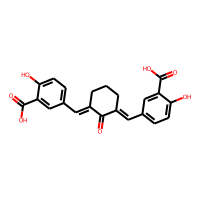
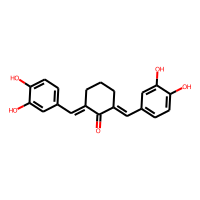
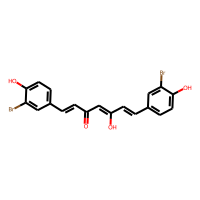
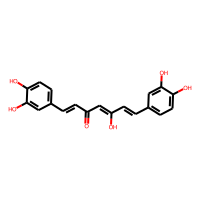
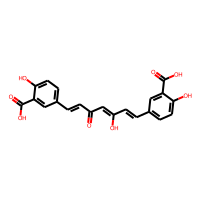

In [25]:
data[data.standard_value.notna()]
data[data.canonical_smiles.notna()]
PandasTools.AddMoleculeColumnToFrame(data,'canonical_smiles','Molecule')
data.head()

In [26]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [27]:
data.standard_value.describe()

count       148.000000
mean      30282.420811
std       70991.225621
min           1.200000
25%        2175.000000
50%        5335.000000
75%       14600.000000
max      500000.000000
Name: standard_value, dtype: float64

In [28]:
-np.log10( (10**-9)* 100000000 )

1.0

In [29]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [30]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

,molecule_chembl_id,canonical_smiles,Molecule,standard_value_norm
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,,168000.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,,233000.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,,33000.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,,46000.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,,21000.0
...,...,...,...,...
143,CHEMBL2203537,CN1C(=O)/C(=C/c2c[nH]c3ccccc23)C(=O)NC1=S,,50000.0
144,CHEMBL4277382,Cc1cc(/C=C2\C(=O)NC(=S)N(C)C2=O)c(C)n1C,,14000.0
145,CHEMBL4287521,CN1C(=O)/C(=C/c2ccc(N3CCOCC3)o2)C(=O)NC1=S,,50000.0
146,CHEMBL4277102,Cc1ccc(N2C(=O)/C(=C\C=C\c3ccco3)C(=O)NC2=S)cc1Cl,,700.0

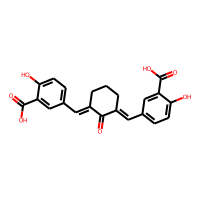
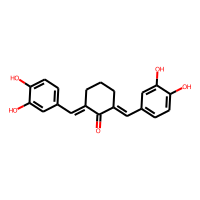
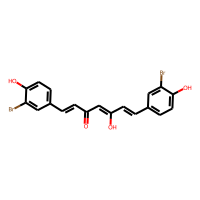
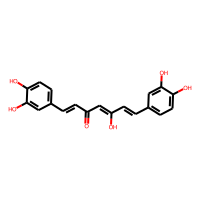
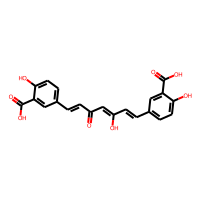
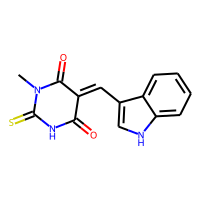
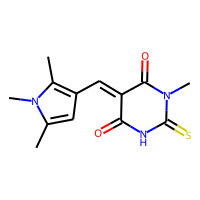
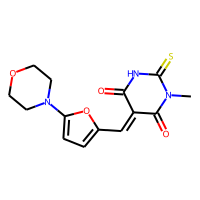
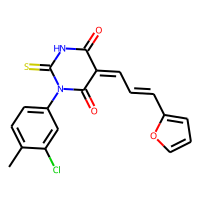
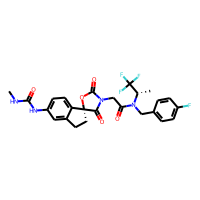

In [31]:
data_norm = norm_value(data)
data_norm

In [32]:
data_norm.standard_value_norm.describe()

count       148.000000
mean      30282.420811
std       70991.225621
min           1.200000
25%        2175.000000
50%        5335.000000
75%       14600.000000
max      500000.000000
Name: standard_value_norm, dtype: float64

,molecule_chembl_id,canonical_smiles,Molecule,pIC50
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,,3.774691
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,,3.632644
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,,4.481486
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,,4.337242
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,,4.677781

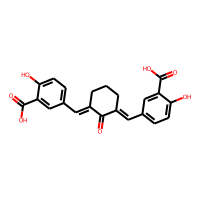
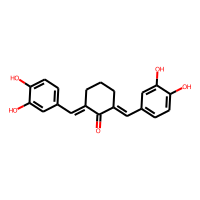
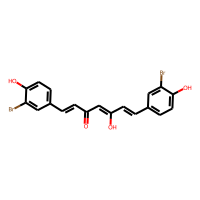
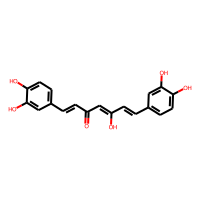
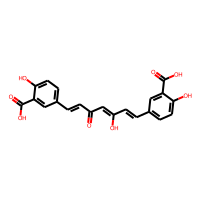

In [33]:
data = pIC50(data_norm)
data.head()

In [34]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        desc_HeavyAtomCount = Descriptors.HeavyAtomCount(mol)
        desc_RingCount = Descriptors.RingCount(mol)
        
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors,
                        desc_HeavyAtomCount,
                        desc_RingCount])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors","HeavyAtomCount","RingCount"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [35]:
data_lipinski = lipinski(data.canonical_smiles)
data_lipinski

,MW,LogP,NumHDonors,NumHAcceptors,HeavyAtomCount,RingCount
0,394.379,3.71420,4.0,5.0,29.0,3.0
1,338.359,3.72900,4.0,5.0,25.0,3.0
2,466.125,5.36040,3.0,4.0,25.0,2.0
3,340.331,3.24660,5.0,6.0,25.0,2.0
4,396.351,3.23180,5.0,6.0,29.0,2.0
...,...,...,...,...,...,...
143,285.328,1.42440,2.0,3.0,20.0,3.0
144,277.349,0.89844,1.0,4.0,19.0,2.0
145,321.358,0.37270,1.0,6.0,22.0,3.0
146,372.833,3.62892,1.0,4.0,25.0,3.0


,molecule_chembl_id,canonical_smiles,Molecule,pIC50,MW,LogP,NumHDonors,NumHAcceptors,HeavyAtomCount,RingCount
0,CHEMBL222543,O=C1/C(=C/c2ccc(O)c(C(=O)O)c2)CCC/C1=C\c1ccc(O...,,3.774691,394.379,3.7142,4.0,5.0,29.0,3.0
1,CHEMBL129148,O=C1/C(=C/c2ccc(O)c(O)c2)CCC/C1=C\c1ccc(O)c(O)c1,,3.632644,338.359,3.7290,4.0,5.0,25.0,3.0
2,CHEMBL221782,O=C(/C=C(O)/C=C/c1ccc(O)c(Br)c1)/C=C/c1ccc(O)c...,,4.481486,466.125,5.3604,3.0,4.0,25.0,2.0
3,CHEMBL129964,O=C(/C=C(O)/C=C/c1ccc(O)c(O)c1)/C=C/c1ccc(O)c(...,,4.337242,340.331,3.2466,5.0,6.0,25.0,2.0
4,CHEMBL222573,O=C(/C=C(O)/C=C/c1ccc(O)c(C(=O)O)c1)/C=C/c1ccc...,,4.677781,396.351,3.2318,5.0,6.0,29.0,2.0

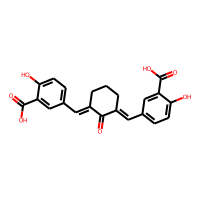
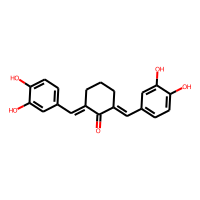
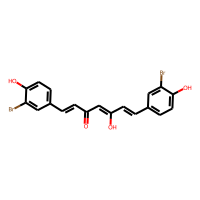
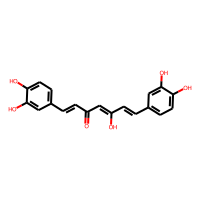
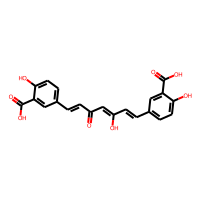

In [36]:
data_final=pd.concat([data,data_lipinski], axis=1)
data_final.head()

In [37]:
data_final. to_csv ('p300_data.csv',index=False)

#Data split and featurizer

In [38]:
user_specified_features = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'HeavyAtomCount']

In [41]:
import deepchem as dc
import tempfile, shutil

featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = data_final(
      tasks=["pIC50"], smiles_field="canonical_smiles", id_field="molecule_chembl_id",
      featurizer=featurizer)
dataset = loader.featurize(data_final)

TypeError: ignored